# Curtailment comparison
Compare optimised and heuristic curtailmet

1) Check how high overloading and voltage issues are if curtailment from optimisation is added as new loads and feedin units

2) Check where optimised and heuristic curtailment differ the most

In [31]:
%load_ext autoreload
%autoreload 2

In [32]:
from edisgo.edisgo import import_edisgo_from_files
import pandas as pd

In [36]:
pip list

Package                       Version             Location
----------------------------- ------------------- ------------------
affine                        2.3.0
alabaster                     0.7.12
argon2-cffi                   20.1.0
async-generator               1.10
atomicwrites                  1.4.0
attrs                         20.3.0
Babel                         2.9.0
backcall                      0.2.0
bleach                        3.2.1
boto3                         1.16.24
botocore                      1.19.24
brotlipy                      0.7.0
certifi                       2020.11.8
cffi                          1.14.3
chardet                       3.0.4
click                         7.1.2
click-plugins                 1.1.1
cligj                         0.7.1
cloudpickle                   1.6.0
colorama                      0.4.4
contextily                    1.0.1
cryptography                  3.2.1
cycler                        0.10.0
decorator                     4.

In [2]:
grid_id = 177
edisgo_dir = r'U:\Software\eDisGo_object_files\simbev_nep_2035_results\{}\optimised'.format(grid_id)

In [33]:
edisgo_obj = import_edisgo_from_files(edisgo_dir, import_timeseries=True)

In [6]:
curtailment_load = pd.read_csv(edisgo_dir+r'\curtailment_load_optimised.csv', index_col=0, parse_dates=True)
curtailment_feedin = pd.read_csv(edisgo_dir+r'\curtailment_feedin_optimised.csv', index_col=0, parse_dates=True)
curtailment_reactive_load = pd.read_csv(edisgo_dir+r'\curtailment_load_reactive_optimised.csv', index_col=0, parse_dates=True)
curtailment_reactive_feedin = pd.read_csv(edisgo_dir+r'\curtailment_feedin_reactive_optimised.csv', index_col=0, parse_dates=True)

In [5]:
curtailment_load.head()

,BusBar_mvgd_177_lvgd_408638_MV,BusBar_mvgd_177_lvgd_408883_MV,BusBar_mvgd_177_lvgd_41839_MV,BusBar_mvgd_177_lvgd_408784_MV,BusBar_mvgd_177_lvgd_408821_MV,BusBar_mvgd_177_lvgd_408952_MV,BusBar_mvgd_177_lvgd_44203_MV,BusBar_mvgd_177_lvgd_44204_MV,BusBar_mvgd_177_lvgd_50895_MV,BranchTee_mvgd_177_1,...,Bus_ChargingPoint_2038,Bus_ChargingPoint_2047,Bus_ChargingPoint_2048,Bus_ChargingPoint_2049,Bus_ChargingPoint_2050,Bus_ChargingPoint_2051,Bus_ChargingPoint_2052,Bus_ChargingPoint_2053,Bus_ChargingPoint_2054,Busbar_mvgd_177_MV.17
2011-04-16 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-16 07:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-16 07:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-16 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-16 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
curtailment_load.sum().sum(), curtailment_reactive_load.sum().sum()

(56.08379980000001, 2.2458425)

In [9]:
curtailment_feedin.sum().sum(), curtailment_reactive_feedin.sum().sum()

(119.01214150000213, 5.399999999999999e-07)

# This step is operated in PyCharm
edisgo_obj.timeseries.mode = 'manual'
for node in curtailment_load:
    if curtailment_load[node].sum().sum()>0:
        name = 'Curtailment_load_{}'.format(node)
        edisgo_obj.add_component('Generator', ts_active_power=curtailment_load[[node]].rename(columns={node:name}),
                                 ts_reactive_power=curtailment_reactive_load[[node]].rename(columns={node:name}), bus=node,
                                generator_id=name, p_nom=curtailment_load[node].max(),
                                generator_type='load_curtailment')
        print('Generator added for curtailment at bus {}'.format(node))
    if curtailment_feedin[node].sum().sum()>0:
        name = 'Curtailment_feedin_{}'.format(node)
        edisgo_obj.add_component('Load', ts_active_power=curtailment_feedin[[node]].rename(columns={node:name}),
                                 ts_reactive_power=curtailment_reactive_feedin[[node]].rename(columns={node:name}), bus=node,
                                load_id=name, peak_load=curtailment_feedin[node].max(),
                                annual_consumption=curtailment_feedin[node].sum(), sector='feedin_curtailment')
        print('Load added for curtailment at bus {}'.format(node))

In [37]:
rel_load = pd.read_csv(r'U:\Software\curtailment\results\rel_load.csv', index_col=0, parse_dates=True)
v_diff = pd.read_csv(r'U:\Software\curtailment\results\v_diff.csv', index_col=0, parse_dates=True)

In [48]:
len(rel_load)

1344

In [42]:
overloading_issues=rel_load[rel_load>1.0].dropna(how='all').dropna(how='all', axis=1)
overloading_issues

,Branch_LVCableDist_mvgd_177_lvgd_41987_125_LVCableDist_mvgd_177_lvgd_41987_127,Branch_LVCableDist_mvgd_177_lvgd_41987_125_LVStation_mvgd_177_lvgd_41987,Branch_LVCableDist_mvgd_177_lvgd_41987_127_LVCableDist_mvgd_177_lvgd_41987_129,Branch_LVCableDist_mvgd_177_lvgd_41987_129_LVCableDist_mvgd_177_lvgd_41987_131,Branch_LVCableDist_mvgd_177_lvgd_41987_131_LVCableDist_mvgd_177_lvgd_41987_133,Branch_LVCableDist_mvgd_177_lvgd_41987_133_LVCableDist_mvgd_177_lvgd_41987_135,Branch_LVCableDist_mvgd_177_lvgd_41987_135_LVCableDist_mvgd_177_lvgd_41987_137,Branch_LVCableDist_mvgd_177_lvgd_41987_137_LVCableDist_mvgd_177_lvgd_41987_139,Branch_LVCableDist_mvgd_177_lvgd_41987_139_LVCableDist_mvgd_177_lvgd_41987_141,Branch_LVCableDist_mvgd_177_lvgd_41987_141_LVCableDist_mvgd_177_lvgd_41987_143,...,Branch_LVCableDist_mvgd_177_lvgd_50901_7_LVCableDist_mvgd_177_lvgd_50901_9,mvlv_station_LVGrid_41987,mvlv_station_LVGrid_42005,mvlv_station_LVGrid_42006,mvlv_station_LVGrid_42010,mvlv_station_LVGrid_50901,mvlv_station_LVGrid_49583,mvlv_station_LVGrid_49593,mvlv_station_LVGrid_49595,mvlv_station_LVGrid_49596
2011-04-16 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.271834,NaN,NaN,NaN,NaN
2011-04-16 07:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.111516,NaN,NaN,NaN,1.153288,NaN,1.019922,NaN,NaN
2011-04-16 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.108720,NaN,NaN,NaN,1.305708,NaN,NaN,NaN,NaN
2011-04-16 07:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.086439,NaN,NaN,NaN,1.407153,NaN,NaN,NaN,NaN
2011-04-16 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.020122,NaN,NaN,NaN,1.526827,NaN,NaN,NaN,NaN
2011-04-16 08:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.016697,NaN,NaN,NaN,1.287600,NaN,NaN,NaN,NaN
2011-04-16 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.074687,NaN,NaN,1.013918,1.044105,NaN,NaN,NaN,NaN
2011-04-16 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.077197,NaN,NaN,NaN,1.006545,NaN,NaN,NaN,NaN
2011-04-16 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.046058,NaN,NaN,NaN,NaN
2011-04-16 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.038583,NaN,NaN,NaN,NaN


In [43]:
voltage_issues=v_diff[v_diff!=0].dropna(how='all').dropna(how='all', axis=1)
voltage_issues

,BusBar_mvgd_177_lvgd_407262_MV,BusBar_mvgd_177_lvgd_41872_MV,BusBar_mvgd_177_lvgd_41905_MV,BusBar_mvgd_177_lvgd_41910_MV,BusBar_mvgd_177_lvgd_41911_MV,BusBar_mvgd_177_lvgd_407651_MV,BusBar_mvgd_177_lvgd_407334_MV,BusBar_mvgd_177_lvgd_41983_MV,BusBar_mvgd_177_lvgd_41985_MV,BusBar_mvgd_177_lvgd_41984_MV,...,Bus_mvgd_177_lvgd_49593_loa_59,BranchTee_mvgd_177_lvgd_49593_119,BranchTee_mvgd_177_lvgd_49593_120,Bus_mvgd_177_lvgd_49593_loa_60,BranchTee_mvgd_177_lvgd_49593_121,BranchTee_mvgd_177_lvgd_49593_122,Bus_mvgd_177_lvgd_49593_loa_61,BranchTee_mvgd_177_lvgd_49593_123,BranchTee_mvgd_177_lvgd_49593_124,Bus_mvgd_177_lvgd_49593_loa_62
2011-04-16 07:00:00,-0.011748,-0.012633,NaN,NaN,-0.006563,NaN,-0.013074,-0.010702,-0.013661,-0.009999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 07:15:00,-0.011753,-0.012633,NaN,NaN,-0.006492,NaN,-0.013071,-0.010712,-0.013655,-0.010014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 07:30:00,-0.011754,-0.012634,NaN,NaN,-0.006417,NaN,-0.013072,-0.010713,-0.013656,-0.010015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 07:45:00,-0.011749,-0.012629,NaN,NaN,-0.006466,NaN,-0.013067,-0.010708,-0.013651,-0.010011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 08:00:00,-0.011693,-0.012613,NaN,-0.000381,-0.006468,NaN,-0.013063,-0.010563,-0.013654,-0.009819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 08:15:00,-0.011682,-0.012602,NaN,-0.000381,-0.006434,NaN,-0.013052,-0.010552,-0.013643,-0.009808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 08:30:00,-0.011704,-0.012624,NaN,-0.000381,-0.006407,NaN,-0.013074,-0.010574,-0.013666,-0.009830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 08:45:00,-0.011714,-0.012634,NaN,-0.000381,-0.006381,NaN,-0.013084,-0.010584,-0.013676,-0.009840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 09:00:00,-0.009526,-0.010408,NaN,NaN,-0.006283,NaN,-0.010839,-0.008451,-0.011414,-0.007754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-16 09:15:00,-0.009575,-0.010456,NaN,-0.000184,-0.006268,NaN,-0.010888,-0.008500,-0.011462,-0.007803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that voltage issues are predominantly detected at the MV side of the stations --> **hints towards problems with the methodology**

<AxesSubplot:>

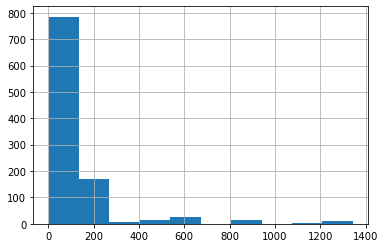

In [63]:
voltage_issues.count().hist()

<AxesSubplot:>

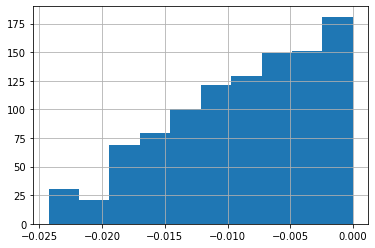

In [64]:
voltage_issues.min().hist()

<AxesSubplot:>

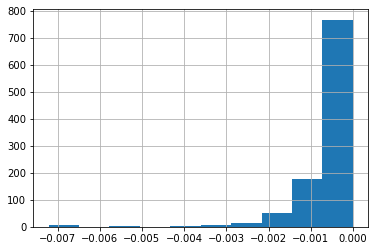

In [65]:
voltage_issues.max().hist()

In [59]:
mv_buses = voltage_issues.columns[voltage_issues.columns.isin(edisgo_obj.topology.mv_grid.buses_df.index)]
lv_buses = voltage_issues.columns[~voltage_issues.columns.isin(mv_buses)]

(<AxesSubplot:>, <AxesSubplot:>)

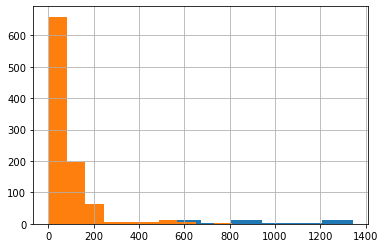

In [66]:
voltage_issues[mv_buses].count().hist(), voltage_issues[lv_buses].count().hist()

<AxesSubplot:>

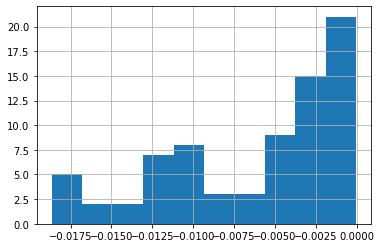

In [68]:
voltage_issues[mv_buses].min().hist()

<AxesSubplot:>

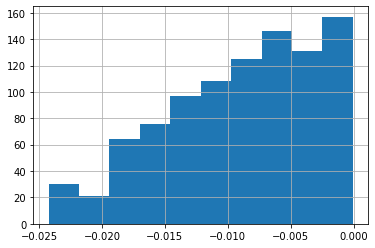

In [69]:
voltage_issues[lv_buses].min().hist()

It seems that mostly LV cables are affected --> hints towards **problems with linearisation**

<AxesSubplot:>

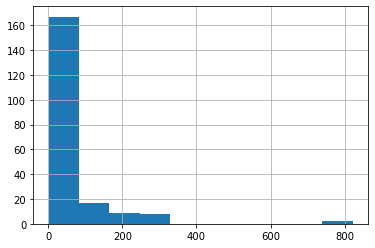

In [70]:
overloading_issues.count().hist()

<AxesSubplot:>

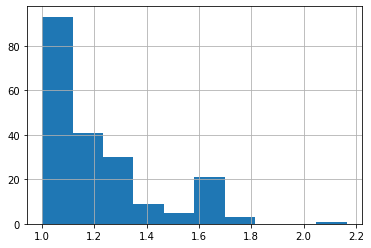

In [88]:
overloading_issues.max().hist()

In [86]:
branches_mv = edisgo_obj.topology.mv_grid.lines_df.append(edisgo_obj.topology.mv_grid.transformers_df)
mv_branches = overloading_issues.columns[overloading_issues.columns.isin(branches_mv.index)]
mvlv_stations = overloading_issues.columns[overloading_issues.columns.str.contains('mvlv_station')]
lv_branches = overloading_issues.columns[(~(overloading_issues.columns.isin(mv_branches)) & (~overloading_issues.columns.isin(mvlv_stations)))]

<AxesSubplot:>

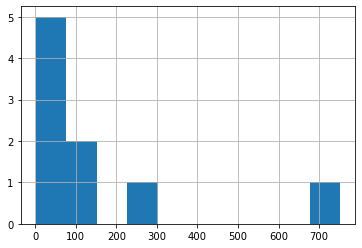

In [93]:
overloading_issues[mvlv_stations].count().hist()

<AxesSubplot:>

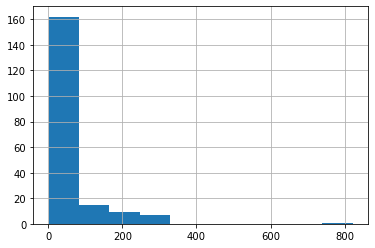

In [94]:
 overloading_issues[lv_branches].count().hist()

<AxesSubplot:>

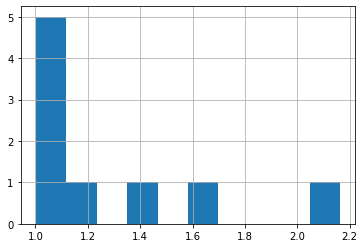

In [95]:
overloading_issues[mvlv_stations].max().hist()

<AxesSubplot:>

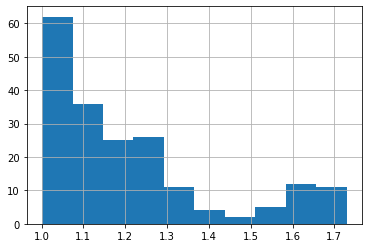

In [96]:
 overloading_issues[lv_branches].max().hist()

# Next steps

* Understand where loading of 2.0 comes from, this should not happen if the implementation is right --> look at function relative_load
* Run optimisation and load flow with curtailed edisgo_object

In [99]:
overloading_issues[overloading_issues==overloading_issues[mvlv_stations].max().max()].dropna(how='all').dropna(how='all', axis=1)

,mvlv_station_LVGrid_50901
2011-12-16 12:30:00,2.163813


In [162]:
overloading_issues['mvlv_station_LVGrid_50901'].head()

2011-04-16 07:00:00    1.271834
2011-04-16 07:15:00    1.153288
2011-04-16 07:30:00    1.305708
2011-04-16 07:45:00    1.407153
2011-04-16 08:00:00    1.526827
Name: mvlv_station_LVGrid_50901, dtype: float64

In [161]:
edisgo_obj.topology.transformers_df.head()

,bus0,bus1,x_pu,r_pu,s_nom,type_info
name,,,,,,
Transformer_lv_grid_407080_1,BusBar_mvgd_177_lvgd_407080_MV,BusBar_mvgd_177_lvgd_407080_LV,0.038311,0.011500,0.40,0.4 MVA 10/0.4 kV
Transformer_lv_grid_407080_2,BusBar_mvgd_177_lvgd_407080_MV,BusBar_mvgd_177_lvgd_407080_LV,0.037206,0.014687,0.16,NaN
Transformer_lv_grid_407174_1,BusBar_mvgd_177_lvgd_407174_MV,BusBar_mvgd_177_lvgd_407174_LV,0.037206,0.014687,0.16,0.16 MVA 10/0.4 kV
Transformer_lv_grid_407174_2,BusBar_mvgd_177_lvgd_407174_MV,BusBar_mvgd_177_lvgd_407174_LV,0.035969,0.017500,0.10,NaN
Transformer_lv_grid_407187_1,BusBar_mvgd_177_lvgd_407187_MV,BusBar_mvgd_177_lvgd_407187_LV,0.035969,0.017500,0.10,0.1 MVA 10/0.4 kV


In [102]:
overloading_issues[overloading_issues==overloading_issues[lv_branches].max().max()].dropna(how='all').dropna(how='all', axis=1)

,Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004
2011-12-16 10:30:00,1.729064


In [103]:
edisgo_obj.topology.lines_df.loc['Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004']

bus0                BusBar_mvgd_177_lvgd_42004_LV
bus1            BranchTee_mvgd_177_lvgd_42004_127
kind                                        cable
length                                      0.006
num_parallel                                    1
r                                     0.000756923
s_nom                                    0.281909
type_info                            NAYY 4x1x185
x                                     0.000371191
Name: Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004, dtype: object

In [148]:
edisgo_obj.topology.lines_df.loc[edisgo_obj.topology.lines_df.bus0=='BusBar_mvgd_177_lvgd_42004_LV']

,bus0,bus1,kind,length,num_parallel,r,s_nom,type_info,x
name,,,,,,,,,
Branch_Generator_mvgd_177_lvgd_42004_solar_roof_mounted_121731_LVStation_mvgd_177_lvgd_42004,BusBar_mvgd_177_lvgd_42004_LV,Bus_mvgd_177_lvgd_42004_gen_121731,cable,0.174618,1.0,0.042983,0.193643,NAYY 4x1x95,0.011014
Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004,BusBar_mvgd_177_lvgd_42004_LV,BranchTee_mvgd_177_lvgd_42004_127,cable,0.006000,1.0,0.000757,0.281909,NAYY 4x1x185,0.000371
Branch_LVCableDist_mvgd_177_lvgd_42004_1_LVStation_mvgd_177_lvgd_42004,BusBar_mvgd_177_lvgd_42004_LV,BranchTee_mvgd_177_lvgd_42004_1,cable,0.100000,1.0,0.007692,0.377379,NAYY 4x1x300,0.006742
Branch_LVCableDist_mvgd_177_lvgd_42004_3_LVStation_mvgd_177_lvgd_42004,BusBar_mvgd_177_lvgd_42004_LV,BranchTee_mvgd_177_lvgd_42004_3,cable,0.068000,1.0,0.008578,0.281909,NAYY 4x1x185,0.004207
Branch_LVCableDist_mvgd_177_lvgd_42004_5_LVStation_mvgd_177_lvgd_42004,BusBar_mvgd_177_lvgd_42004_LV,BranchTee_mvgd_177_lvgd_42004_5,cable,0.010000,1.0,0.001262,0.281909,NAYY 4x1x185,0.000619
Line_BusBar_mvgd_177_lvgd_42004_LV_Bus_Generator_3363005,BusBar_mvgd_177_lvgd_42004_LV,Bus_Generator_3363005,cable,0.223920,1.0,0.013690,0.220663,NAYY 4x1x120,0.044095
Line_BusBar_mvgd_177_lvgd_42004_LV_Bus_Generator_3363006,BusBar_mvgd_177_lvgd_42004_LV,Bus_Generator_3363006,cable,0.242354,1.0,0.014818,0.220663,NAYY 4x1x120,0.047725
Line_BusBar_mvgd_177_lvgd_42004_LV_Bus_ChargingPoint_111,BusBar_mvgd_177_lvgd_42004_LV,Bus_ChargingPoint_111,cable,0.157482,1.0,0.012178,0.193643,NAYY 4x1x95,0.031618
Line_BusBar_mvgd_177_lvgd_42004_LV_Bus_ChargingPoint_2277,BusBar_mvgd_177_lvgd_42004_LV,Bus_ChargingPoint_2277,cable,0.213689,1.0,0.044824,0.110782,NAYY 4x1x35,0.044546


In [120]:
edisgo_curt = import_edisgo_from_files(r'U:\Software\curtailment\results\177', import_timeseries=True)
pypsa_network = edisgo_curt.to_pypsa()

In [121]:
pypsa_network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2011-04-16 07:00:00', '2011-04-16 07:15:00',
               '2011-04-16 07:30:00', '2011-04-16 07:45:00',
               '2011-04-16 08:00:00', '2011-04-16 08:15:00',
               '2011-04-16 08:30:00', '2011-04-16 08:45:00',
               '2011-04-16 09:00:00', '2011-04-16 09:15:00',
               ...
               '2011-12-17 04:30:00', '2011-12-17 04:45:00',
               '2011-12-17 05:00:00', '2011-12-17 05:15:00',
               '2011-12-17 05:30:00', '2011-12-17 05:45:00',
               '2011-12-17 06:00:00', '2011-12-17 06:15:00',
               '2011-12-17 06:30:00', '2011-12-17 06:45:00'],
              dtype='datetime64[ns]', length=1344, freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.370012 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346496 seconds
INFO:pypsa.pf:Newton-Raphso

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383795 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.386219 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362072 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383737 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.373571 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368109 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368176 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368599 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368192 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368380 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383794 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362072 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346394 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383766 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352931 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.389851 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.378512 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399927 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399365 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346506 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.411524 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.469015 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.396013 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.421513 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.444014 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.434010 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.447514 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.422014 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.432014 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.421014 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368152 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383795 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368203 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383828 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383135 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346431 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346466 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346461 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.377754 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.380635 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399407 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384189 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.350867 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346409 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346407 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384223 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346892 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400380 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383841 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.379199 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400182 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.417269 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368539 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346440 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368111 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368107 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368654 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384192 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346505 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.380879 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362460 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346912 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362141 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.347953 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368177 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352588 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399463 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.335886 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352504 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346955 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.381207 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346349 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.379239 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368090 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.386862 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.364509 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.405268 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346889 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346910 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.378736 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383857 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352921 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352986 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.349357 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368154 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368623 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383781 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.353005 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.377765 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.389308 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.369779 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.370908 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.350173 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.354333 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.410423 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.370362 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.379997 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.385607 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362467 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.416142 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352713 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368611 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.416530 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400345 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368579 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368681 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399428 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368538 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400426 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.462515 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.434007 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.462512 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.386505 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.407010 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.373509 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.427011 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.421008 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.411011 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399928 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384311 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.378215 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.385176 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.415060 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.430654 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362623 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.446842 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362590 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.383731 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384228 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.446773 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.409881 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.424510 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.416010 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.435257 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384259 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.408377 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.432380 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.446388 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.397239 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.368550 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.436167 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.384542 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.437646 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.399838 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352925 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400328 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.362585 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.431282 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.346966 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

{'n_iter':                      0
 2011-04-16 07:00:00  3
 2011-04-16 07:15:00  3
 2011-04-16 07:30:00  3
 2011-04-16 07:45:00  3
 2011-04-16 08:00:00  3
 2011-04-16 08:15:00  3
 2011-04-16 08:30:00  3
 2011-04-16 08:45:00  3
 2011-04-16 09:00:00  3
 2011-04-16 09:15:00  3
 2011-04-16 09:30:00  3
 2011-04-16 09:45:00  3
 2011-04-16 10:00:00  3
 2011-04-16 10:15:00  3
 2011-04-16 10:30:00  3
 2011-04-16 10:45:00  3
 2011-04-16 11:00:00  3
 2011-04-16 11:15:00  3
 2011-04-16 11:30:00  3
 2011-04-16 11:45:00  3
 2011-04-16 12:00:00  3
 2011-04-16 12:15:00  3
 2011-04-16 12:30:00  3
 2011-04-16 12:45:00  3
 2011-04-16 13:00:00  3
 2011-04-16 13:15:00  3
 2011-04-16 13:30:00  3
 2011-04-16 13:45:00  3
 2011-04-16 14:00:00  3
 2011-04-16 14:15:00  3
 ...                 ..
 2011-12-16 23:30:00  3
 2011-12-16 23:45:00  3
 2011-12-17 00:00:00  3
 2011-12-17 00:15:00  3
 2011-12-17 00:30:00  3
 2011-12-17 00:45:00  3
 2011-12-17 01:00:00  3
 2011-12-17 01:15:00  3
 2011-12-17 01:30:00  3
 2011-

In [127]:
losses = pypsa_network.lines_t.p0+pypsa_network.lines_t.p1

In [163]:
losses_q = pypsa_network.lines_t.q0+pypsa_network.lines_t.q1

In [137]:
from edisgo.flex_opt.optimization import setup_model
from edisgo.tools.networkx_helper import get_downstream_nodes_matrix_iterative

In [138]:
timeindex = edisgo_curt.timeseries.timeindex[0:5]
downstream_nodes_matrix = get_downstream_nodes_matrix_iterative(edisgo_curt.topology)

downstream_nodes_matrix = downstream_nodes_matrix.astype(np.uint8)
objective='residual_load'
model = setup_model(edisgo_obj, downstream_nodes_matrix, timesteps, objective=objective,
                                optimize_storage=False, optimize_ev_charging=False,
                                pu=False, v_min=0, v_max=2)

Matrix for 20246 buses is extracted.
Starting iteration.
0.049392472587177716 % of the buses have been checked
0.09878494517435543 % of the buses have been checked
0.14817741776153315 % of the buses have been checked
0.19756989034871086 % of the buses have been checked
0.24696236293588855 % of the buses have been checked
0.2963548355230663 % of the buses have been checked
0.345747308110244 % of the buses have been checked
0.3951397806974217 % of the buses have been checked
0.44453225328459944 % of the buses have been checked
0.4939247258717771 % of the buses have been checked
0.5433171984589549 % of the buses have been checked
0.5927096710461326 % of the buses have been checked
0.6421021436333103 % of the buses have been checked
0.691494616220488 % of the buses have been checked
0.7408870888076657 % of the buses have been checked
0.7902795613948435 % of the buses have been checked
0.8396720339820212 % of the buses have been checked
0.8890645065691989 % of the buses have been checked
0.

7.902795613948434 % of the buses have been checked
7.952188086535612 % of the buses have been checked
8.00158055912279 % of the buses have been checked
8.050973031709967 % of the buses have been checked
8.100365504297145 % of the buses have been checked
8.149757976884322 % of the buses have been checked
8.199150449471501 % of the buses have been checked
8.248542922058679 % of the buses have been checked
8.297935394645856 % of the buses have been checked
8.347327867233034 % of the buses have been checked
8.396720339820211 % of the buses have been checked
8.446112812407389 % of the buses have been checked
8.495505284994568 % of the buses have been checked
8.544897757581744 % of the buses have been checked
8.594290230168921 % of the buses have been checked
8.6436827027561 % of the buses have been checked
8.693075175343278 % of the buses have been checked
8.742467647930455 % of the buses have been checked
8.791860120517633 % of the buses have been checked
8.84125259310481 % of the buses ha

15.805591227896867 % of the buses have been checked
15.854983700484047 % of the buses have been checked
15.904376173071224 % of the buses have been checked
15.9537686456584 % of the buses have been checked
16.00316111824558 % of the buses have been checked
16.05255359083276 % of the buses have been checked
16.101946063419934 % of the buses have been checked
16.151338536007113 % of the buses have been checked
16.20073100859429 % of the buses have been checked
16.25012348118147 % of the buses have been checked
16.299515953768644 % of the buses have been checked
16.348908426355823 % of the buses have been checked
16.398300898943003 % of the buses have been checked
16.44769337153018 % of the buses have been checked
16.497085844117358 % of the buses have been checked
16.546478316704537 % of the buses have been checked
16.595870789291713 % of the buses have been checked
16.64526326187889 % of the buses have been checked
16.694655734466068 % of the buses have been checked
16.744048207053243 %

23.658994369258124 % of the buses have been checked
23.708386841845304 % of the buses have been checked
23.757779314432483 % of the buses have been checked
23.80717178701966 % of the buses have been checked
23.856564259606834 % of the buses have been checked
23.905956732194014 % of the buses have been checked
23.95534920478119 % of the buses have been checked
24.00474167736837 % of the buses have been checked
24.054134149955548 % of the buses have been checked
24.103526622542727 % of the buses have been checked
24.152919095129903 % of the buses have been checked
24.20231156771708 % of the buses have been checked
24.251704040304258 % of the buses have been checked
24.301096512891434 % of the buses have been checked
24.350488985478613 % of the buses have been checked
24.399881458065792 % of the buses have been checked
24.449273930652968 % of the buses have been checked
24.498666403240147 % of the buses have been checked
24.548058875827326 % of the buses have been checked
24.5974513484145

31.512397510619383 % of the buses have been checked
31.561789983206562 % of the buses have been checked
31.611182455793735 % of the buses have been checked
31.660574928380914 % of the buses have been checked
31.709967400968093 % of the buses have been checked
31.75935987355527 % of the buses have been checked
31.808752346142448 % of the buses have been checked
31.858144818729627 % of the buses have been checked
31.9075372913168 % of the buses have been checked
31.95692976390398 % of the buses have been checked
32.00632223649116 % of the buses have been checked
32.05571470907834 % of the buses have been checked
32.10510718166552 % of the buses have been checked
32.154499654252696 % of the buses have been checked
32.20389212683987 % of the buses have been checked
32.25328459942705 % of the buses have been checked
32.30267707201423 % of the buses have been checked
32.352069544601406 % of the buses have been checked
32.40146201718858 % of the buses have been checked
32.45085448977576 % of 

39.415193124567814 % of the buses have been checked
39.46458559715499 % of the buses have been checked
39.51397806974217 % of the buses have been checked
39.56337054232935 % of the buses have been checked
39.612763014916524 % of the buses have been checked
39.6621554875037 % of the buses have been checked
39.71154796009088 % of the buses have been checked
39.76094043267806 % of the buses have been checked
39.81033290526524 % of the buses have been checked
39.85972537785242 % of the buses have been checked
39.90911785043959 % of the buses have been checked
39.95851032302677 % of the buses have been checked
40.007902795613944 % of the buses have been checked
40.05729526820112 % of the buses have been checked
40.1066877407883 % of the buses have been checked
40.15608021337548 % of the buses have been checked
40.205472685962654 % of the buses have been checked
40.25486515854983 % of the buses have been checked
40.30425763113701 % of the buses have been checked
40.35365010372419 % of the bu

47.36738121110343 % of the buses have been checked
47.41677368369061 % of the buses have been checked
47.46616615627779 % of the buses have been checked
47.515558628864966 % of the buses have been checked
47.56495110145214 % of the buses have been checked
47.61434357403932 % of the buses have been checked
47.66373604662649 % of the buses have been checked
47.71312851921367 % of the buses have been checked
47.76252099180085 % of the buses have been checked
47.81191346438803 % of the buses have been checked
47.86130593697521 % of the buses have been checked
47.91069840956238 % of the buses have been checked
47.96009088214956 % of the buses have been checked
48.00948335473674 % of the buses have been checked
48.05887582732392 % of the buses have been checked
48.108268299911096 % of the buses have been checked
48.157660772498275 % of the buses have been checked
48.207053245085454 % of the buses have been checked
48.25644571767263 % of the buses have been checked
48.305838190259806 % of the

55.27017682505186 % of the buses have been checked
55.319569297639035 % of the buses have been checked
55.36896177022622 % of the buses have been checked
55.41835424281339 % of the buses have been checked
55.467746715400565 % of the buses have been checked
55.51713918798775 % of the buses have been checked
55.566531660574924 % of the buses have been checked
55.61592413316211 % of the buses have been checked
55.66531660574928 % of the buses have been checked
55.71470907833647 % of the buses have been checked
55.76410155092364 % of the buses have been checked
55.81349402351081 % of the buses have been checked
55.862886496098 % of the buses have been checked
55.91227896868517 % of the buses have been checked
55.96167144127235 % of the buses have been checked
56.01106391385953 % of the buses have been checked
56.06045638644671 % of the buses have been checked
56.10984885903388 % of the buses have been checked
56.159241331621054 % of the buses have been checked
56.20863380420824 % of the bu

63.22236491158747 % of the buses have been checked
63.271757384174656 % of the buses have been checked
63.32114985676183 % of the buses have been checked
63.370542329349014 % of the buses have been checked
63.419934801936186 % of the buses have been checked
63.46932727452336 % of the buses have been checked
63.51871974711054 % of the buses have been checked
63.56811221969772 % of the buses have been checked
63.617504692284896 % of the buses have been checked
63.66689716487207 % of the buses have been checked
63.716289637459255 % of the buses have been checked
63.76568211004643 % of the buses have been checked
63.8150745826336 % of the buses have been checked
63.864467055220786 % of the buses have been checked
63.91385952780796 % of the buses have been checked
63.963252000395144 % of the buses have been checked
64.01264447298232 % of the buses have been checked
64.0620369455695 % of the buses have been checked
64.11142941815667 % of the buses have been checked
64.16082189074385 % of the

71.17455299812309 % of the buses have been checked
71.22394547071026 % of the buses have been checked
71.27333794329745 % of the buses have been checked
71.32273041588462 % of the buses have been checked
71.37212288847181 % of the buses have been checked
71.42151536105898 % of the buses have been checked
71.47090783364615 % of the buses have been checked
71.52030030623334 % of the buses have been checked
71.56969277882051 % of the buses have been checked
71.61908525140768 % of the buses have been checked
71.66847772399485 % of the buses have been checked
71.71787019658204 % of the buses have been checked
71.76726266916921 % of the buses have been checked
71.81665514175639 % of the buses have been checked
71.86604761434357 % of the buses have been checked
71.91544008693074 % of the buses have been checked
71.96483255951793 % of the buses have been checked
72.0142250321051 % of the buses have been checked
72.06361750469229 % of the buses have been checked
72.11300997727946 % of the buses

79.17613355724588 % of the buses have been checked
79.22552602983305 % of the buses have been checked
79.27491850242023 % of the buses have been checked
79.3243109750074 % of the buses have been checked
79.3737034475946 % of the buses have been checked
79.42309592018177 % of the buses have been checked
79.47248839276895 % of the buses have been checked
79.52188086535612 % of the buses have been checked
79.5712733379433 % of the buses have been checked
79.62066581053048 % of the buses have been checked
79.67005828311765 % of the buses have been checked
79.71945075570484 % of the buses have been checked
79.76884322829201 % of the buses have been checked
79.81823570087919 % of the buses have been checked
79.86762817346637 % of the buses have been checked
79.91702064605354 % of the buses have been checked
79.96641311864072 % of the buses have been checked
80.01580559122789 % of the buses have been checked
80.06519806381507 % of the buses have been checked
80.11459053640225 % of the buses h

87.17771411636866 % of the buses have been checked
87.22710658895583 % of the buses have been checked
87.27649906154302 % of the buses have been checked
87.3258915341302 % of the buses have been checked
87.37528400671738 % of the buses have been checked
87.42467647930455 % of the buses have been checked
87.47406895189174 % of the buses have been checked
87.52346142447891 % of the buses have been checked
87.57285389706608 % of the buses have been checked
87.62224636965327 % of the buses have been checked
87.67163884224044 % of the buses have been checked
87.72103131482763 % of the buses have been checked
87.7704237874148 % of the buses have been checked
87.81981626000197 % of the buses have been checked
87.86920873258916 % of the buses have been checked
87.91860120517633 % of the buses have been checked
87.96799367776352 % of the buses have been checked
88.01738615035069 % of the buses have been checked
88.06677862293787 % of the buses have been checked
88.11617109552505 % of the buses 

95.17929467549145 % of the buses have been checked
95.22868714807863 % of the buses have been checked
95.2780796206658 % of the buses have been checked
95.32747209325298 % of the buses have been checked
95.37686456584017 % of the buses have been checked
95.42625703842734 % of the buses have been checked
95.47564951101452 % of the buses have been checked
95.5250419836017 % of the buses have been checked
95.57443445618887 % of the buses have been checked
95.62382692877605 % of the buses have been checked
95.67321940136323 % of the buses have been checked
95.72261187395041 % of the buses have been checked
95.77200434653759 % of the buses have been checked
95.82139681912476 % of the buses have been checked
95.87078929171194 % of the buses have been checked
95.92018176429912 % of the buses have been checked
95.9695742368863 % of the buses have been checked
96.01896670947347 % of the buses have been checked
96.06835918206066 % of the buses have been checked
96.11775165464783 % of the buses h

NameError: name 'np' is not defined

In [144]:
from edisgo.flex_opt.optimization import prepare_time_invariant_parameters
parameters = prepare_time_invariant_parameters(edisgo_curt, downstream_nodes_matrix, pu=False, optimize_storage=False,
                                               optimize_ev_charging=False)


In [152]:
underlying_buses = parameters['underlying_branch_elements'].loc['Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004', 'buses']

In [156]:
underlying_branches=edisgo_obj.topology.lines_df.loc[edisgo_obj.topology.lines_df.bus0.isin(underlying_buses)].append(
edisgo_obj.topology.lines_df.loc[edisgo_obj.topology.lines_df.bus1.isin(underlying_buses)])

In [165]:
max_branch_loss = losses[underlying_branches.index].sum(axis=1)/edisgo_obj.topology.lines_df.loc['Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004','s_nom']

In [167]:
max_branch_loss_q = losses_q[underlying_branches.index].sum(axis=1)/edisgo_obj.topology.lines_df.loc['Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004','s_nom']

In [168]:
max_branch_loss[pd.to_datetime('2011-12-16 10:30:00')], max_branch_loss_q[pd.to_datetime('2011-12-16 10:30:00')]

(0.17441195166256335, 0.08493308542596074)

In [128]:
losses['Branch_LVCableDist_mvgd_177_lvgd_42004_127_LVStation_mvgd_177_lvgd_42004']

2011-04-16 07:00:00    0.000426
2011-04-16 07:15:00    0.000391
2011-04-16 07:30:00    0.000469
2011-04-16 07:45:00    0.000580
2011-04-16 08:00:00    0.000505
2011-04-16 08:15:00    0.000428
2011-04-16 08:30:00    0.000333
2011-04-16 08:45:00    0.000278
2011-04-16 09:00:00    0.000185
2011-04-16 09:15:00    0.000185
2011-04-16 09:30:00    0.000165
2011-04-16 09:45:00    0.000193
2011-04-16 10:00:00    0.000184
2011-04-16 10:15:00    0.000125
2011-04-16 10:30:00    0.000069
2011-04-16 10:45:00    0.000069
2011-04-16 11:00:00    0.000072
2011-04-16 11:15:00    0.000077
2011-04-16 11:30:00    0.000073
2011-04-16 11:45:00    0.000186
2011-04-16 12:00:00    0.000236
2011-04-16 12:15:00    0.000236
2011-04-16 12:30:00    0.000236
2011-04-16 12:45:00    0.000189
2011-04-16 13:00:00    0.000130
2011-04-16 13:15:00    0.000135
2011-04-16 13:30:00    0.000135
2011-04-16 13:45:00    0.000141
2011-04-16 14:00:00    0.000104
2011-04-16 14:15:00    0.000136
                         ...   
2011-12-

In [109]:
feeder_0 = import_edisgo_from_files(r'U:\Software\curtailment\results\177', import_timeseries=True)

In [110]:
feeder_pypsa = feeder_0.to_pypsa()

In [111]:
feeder_pypsa.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2011-04-16 07:00:00', '2011-04-16 07:15:00',
               '2011-04-16 07:30:00', '2011-04-16 07:45:00',
               '2011-04-16 08:00:00', '2011-04-16 08:15:00',
               '2011-04-16 08:30:00', '2011-04-16 08:45:00',
               '2011-04-16 09:00:00', '2011-04-16 09:15:00',
               ...
               '2011-12-17 04:30:00', '2011-12-17 04:45:00',
               '2011-12-17 05:00:00', '2011-12-17 05:15:00',
               '2011-12-17 05:30:00', '2011-12-17 05:45:00',
               '2011-12-17 06:00:00', '2011-12-17 06:15:00',
               '2011-12-17 06:30:00', '2011-12-17 06:45:00'],
              dtype='datetime64[ns]', length=1344, freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.033500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphso

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036497 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037004 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.052502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050002 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.043501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036494 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.035993 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036009 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036494 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036002 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.035001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.035493 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036008 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036495 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036999 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.051496 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.052531 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036497 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037002 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036504 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.046499 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.031195 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.031250 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.035784 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036508 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.035501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036491 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.053501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.046501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036999 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036992 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037502 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.052000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.052501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.048001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036505 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036000 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037503 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036500 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036001 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036504 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036008 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036501 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

{'n_iter':                      0
 2011-04-16 07:00:00  3
 2011-04-16 07:15:00  3
 2011-04-16 07:30:00  3
 2011-04-16 07:45:00  3
 2011-04-16 08:00:00  3
 2011-04-16 08:15:00  3
 2011-04-16 08:30:00  3
 2011-04-16 08:45:00  3
 2011-04-16 09:00:00  3
 2011-04-16 09:15:00  3
 2011-04-16 09:30:00  3
 2011-04-16 09:45:00  3
 2011-04-16 10:00:00  3
 2011-04-16 10:15:00  3
 2011-04-16 10:30:00  3
 2011-04-16 10:45:00  3
 2011-04-16 11:00:00  3
 2011-04-16 11:15:00  3
 2011-04-16 11:30:00  3
 2011-04-16 11:45:00  3
 2011-04-16 12:00:00  3
 2011-04-16 12:15:00  3
 2011-04-16 12:30:00  3
 2011-04-16 12:45:00  3
 2011-04-16 13:00:00  3
 2011-04-16 13:15:00  3
 2011-04-16 13:30:00  3
 2011-04-16 13:45:00  3
 2011-04-16 14:00:00  3
 2011-04-16 14:15:00  3
 ...                 ..
 2011-12-16 23:30:00  3
 2011-12-16 23:45:00  3
 2011-12-17 00:00:00  3
 2011-12-17 00:15:00  3
 2011-12-17 00:30:00  3
 2011-12-17 00:45:00  3
 2011-12-17 01:00:00  3
 2011-12-17 01:15:00  3
 2011-12-17 01:30:00  3
 2011-

In [119]:
overloading_feeder = overloading_issues[overloading_issues.columns[overloading_issues.columns.isin(feeder_0.topology.lines_df.index)]]
overloading_feeder.head()

""
2011-04-16 07:00:00
2011-04-16 07:15:00
2011-04-16 07:30:00
2011-04-16 07:45:00
2011-04-16 08:00:00


In [116]:
feeder_0.topology.lines_df.index

Index(['Branch_LVStation_mvgd_177_lvgd_408504_MVCableDist_mvgd_177_1',
       'Branch_LVStation_mvgd_177_lvgd_408638_LVStation_mvgd_177_lvgd_408784',
       'Branch_LVStation_mvgd_177_lvgd_408638_LVStation_mvgd_177_lvgd_50895',
       'Branch_LVStation_mvgd_177_lvgd_408784_LVStation_mvgd_177_lvgd_408821',
       'Branch_LVStation_mvgd_177_lvgd_408821_LVStation_mvgd_177_lvgd_408952',
       'Branch_LVStation_mvgd_177_lvgd_408883_LVStation_mvgd_177_lvgd_408952',
       'Branch_LVStation_mvgd_177_lvgd_408883_MVCableDist_mvgd_177_5',
       'Branch_LVStation_mvgd_177_lvgd_41839_MVCableDist_mvgd_177_1',
       'Branch_LVStation_mvgd_177_lvgd_44203_MVCableDist_mvgd_177_5',
       'Branch_LVStation_mvgd_177_lvgd_44204_MVCableDist_mvgd_177_1',
       ...
       'Branch_LVCableDist_mvgd_177_lvgd_50895_2_Load_mvgd_177_lvgd_50895_1',
       'Branch_LVCableDist_mvgd_177_lvgd_50895_3_LVCableDist_mvgd_177_lvgd_50895_4',
       'Branch_LVCableDist_mvgd_177_lvgd_50895_4_Load_mvgd_177_lvgd_50895_2',
  